<a href="https://colab.research.google.com/github/psyifa/Analisis-Sosial-Media/blob/main/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mencari Most Influential Dalam Jaringan Social Twitter

1. Muhammad Abrar Triyadi - 1305213046
2. Syifa Putri Fadhilla - 1305210084

Menginstall library networkx dan install upgrade matplotlib

In [ ]:
!pip install --upgrade networkx

Import library yang digunakan untuk melakukan analisis

- Pandas digunakan untuk melakukan import dataset
- Networkx digunakan untuk membuat graph, visualisasi graph, dan melakukan perhitungan centralitas
- Matplotlib digunakan untuk membuat visualisasi graph

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Mengimport dataset hasil crawling dengan kata kunci "Boikot" dari twitter dengan menggunakan tweetharvest.

In [ ]:
#Import Dataset
df = pd.read_csv("/content/boikot.csv", sep=";")
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Nov 13 15:10:26 +0000 2023,1724082297765507259,itu berita sblm rame boikot wahai manusia pro ...,0,0,0,0,in,1340725868465799169,1724082297765507259,BaroqahHusni,https://twitter.com/BaroqahHusni/status/172408...
1,Mon Nov 13 15:10:15 +0000 2023,1724082252920049854,@syf2019 @nimbyfirouzi @tanyakanrl Ga masalah....,0,0,0,0,in,1271118568155803648,1723921129960767634,LutfiaAyu8,https://twitter.com/LutfiaAyu8/status/17240822...
2,Mon Nov 13 15:09:59 +0000 2023,1724082183860891720,@Urrangawak Gak ada pilihan lain selain boikot...,0,0,0,0,in,1633653948019249152,1724039496680022497,BobyDar4,https://twitter.com/BobyDar4/status/1724082183...
3,Mon Nov 13 15:09:41 +0000 2023,1724082108652794304,"Faktanya,pemboikotan kita benar-benar berpenga...",0,0,0,1,in,1588842390324137984,1724082108652794304,nenglaela93,https://twitter.com/nenglaela93/status/1724082...
4,Mon Nov 13 15:09:27 +0000 2023,1724082049529860253,Pesawat tempur Israhell mengebom rumah keluarg...,0,0,0,0,in,1335424893383368706,1724082049529860253,Babypink127,https://twitter.com/Babypink127/status/1724082...
...,...,...,...,...,...,...,...,...,...,...,...,...
756,Mon Nov 13 13:11:56 +0000 2023,1724052477799252351,Boikot gtu. Terus mereka ibu² nya nyeletuk kay...,0,1,0,0,in,1720329441493368832,1724051802868662294,seccyupiszz,https://twitter.com/seccyupiszz/status/1724052...
757,Mon Nov 13 13:11:54 +0000 2023,1724052467627765904,@jyankirstein @Mizumiz999 @juyoentan @tanyarlf...,0,1,0,0,in,1579523352628465666,1723987562874978444,CossinBlue,https://twitter.com/CossinBlue/status/17240524...
758,Mon Nov 13 13:11:38 +0000 2023,1724052399936197022,"Selain boikot Disney, MCU tu pun dah capai tah...",0,0,0,0,in,249872394,1724052399936197022,muizu_,https://twitter.com/muizu_/status/172405239993...
759,Mon Nov 13 13:11:23 +0000 2023,1724052340443910449,@tanyarlfes Nggak boikot juga udah gapernah ma...,0,0,0,0,in,74342218,1723987562874978444,fajardz,https://twitter.com/fajardz/status/17240523404...


Melihat jumlah tweet yang berhasil diambil dari crawling dengan tweetharvest

In [ ]:
#Melihat banyaknya data yang didapatkan
num_tweets = len(df)
print(f"Jumlah data tweet yang didapatkan adalah {num_tweets}.")

Jumlah data tweet yang didapatkan adalah 761.


Kami akan menghubungkan graph dengan nodes-nya adalah username yang melakukan tweet dan edges-nya adalah mention akun yang berinteraksi dalam tweet tersebut. Pada tahap ini kami memisahkan kolom full text yang berisi tweet dan mention-nya, dan kolom username.

In [ ]:
#Memisahkan kolom full_text dan username
dff = df[["full_text","username"]]
dff

,full_text,username
0,itu berita sblm rame boikot wahai manusia pro ...,BaroqahHusni
1,@syf2019 @nimbyfirouzi @tanyakanrl Ga masalah....,LutfiaAyu8
2,@Urrangawak Gak ada pilihan lain selain boikot...,BobyDar4
3,"Faktanya,pemboikotan kita benar-benar berpenga...",nenglaela93
4,Pesawat tempur Israhell mengebom rumah keluarg...,Babypink127
...,...,...
756,Boikot gtu. Terus mereka ibu² nya nyeletuk kay...,seccyupiszz
757,@jyankirstein @Mizumiz999 @juyoentan @tanyarlf...,CossinBlue
758,"Selain boikot Disney, MCU tu pun dah capai tah...",muizu_
759,@tanyarlfes Nggak boikot juga udah gapernah ma...,fajardz


Melakukan filtering dalam kolom full text dimana hanya diambil tweet yang mengandung mention saja

In [ ]:
#Memfilter dalam kolom full_text yang hanya memiliki mention
a = dff[dff['full_text'].str.contains('@')]


In [ ]:
#Menampilkan hasil filter
a

,full_text,username
1,@syf2019 @nimbyfirouzi @tanyakanrl Ga masalah....,LutfiaAyu8
2,@Urrangawak Gak ada pilihan lain selain boikot...,BobyDar4
5,@Ir_solihin99 Boikot oi boikot 😂,seorangabang
6,@chairmanGLC Taknak boikot mcd,HasrulZulfadli
8,@OmJ_JeNggot Kalo munafik jangan tanggung lah ...,TukangBatuWR
...,...,...
753,@Urrangawak Rasa kemanusiaan sudah terusik ole...,SherlyAnjani96
755,@tanyakanrl Gue yakin mana ada perusahan yang ...,kitabisapa
757,@jyankirstein @Mizumiz999 @juyoentan @tanyarlf...,CossinBlue
759,@tanyarlfes Nggak boikot juga udah gapernah ma...,fajardz


Selanjutnya untuk memudahkan proses pembentukan graph, tweet full text dihilangkan dan hanya akan menyisakan mention saja.

In [ ]:
#Fungsi untuk menghilangkan teks dan hanya menyisakan mention saja
def remove(text):
    x = text.split()
    words_with_at = [word for word in x if '@' in word]
    return ' '.join(words_with_at)

a['full_text'] = a['full_text'].apply(remove)
a

,full_text,username
1,@syf2019 @nimbyfirouzi @tanyakanrl,LutfiaAyu8
2,@Urrangawak,BobyDar4
5,@Ir_solihin99,seorangabang
6,@chairmanGLC,HasrulZulfadli
8,@OmJ_JeNggot,TukangBatuWR
...,...,...
753,@Urrangawak,SherlyAnjani96
755,@tanyakanrl,kitabisapa
757,@jyankirstein @Mizumiz999 @juyoentan @tanyarlfes,CossinBlue
759,@tanyarlfes,fajardz


Karena didapati bahwa dalam beberapa tweet ada yang mengandung banyak mention, maka tahap ini kami memisahkan tiap mention menjadi satu per satu.

In [ ]:
#Memisahkan beberapa mention dalam satu tweet menjadi masing-masing
a['mentions'] = a['full_text'].str.split()

a_expanded = a.explode('mentions')

a_result = a_expanded[['mentions', 'username']]

a_result

,mentions,username
1,@syf2019,LutfiaAyu8
1,@nimbyfirouzi,LutfiaAyu8
1,@tanyakanrl,LutfiaAyu8
2,@Urrangawak,BobyDar4
5,@Ir_solihin99,seorangabang
...,...,...
760,@MEY_ARD1ANSYAH,Biano64
760,@NengIteung2021,Biano64
760,@Dee_Rose82,Biano64
760,@DaniCicadasBdg,Biano64


Selanjutnya menghapus '@' untuk memudahkan membuat graph.

In [ ]:
#Menghapus @
a_result['mentions'] = a_result['mentions'].str.replace('@','')
a_result

,mentions,username
1,syf2019,LutfiaAyu8
1,nimbyfirouzi,LutfiaAyu8
1,tanyakanrl,LutfiaAyu8
2,Urrangawak,BobyDar4
5,Ir_solihin99,seorangabang
...,...,...
760,MEY_ARD1ANSYAH,Biano64
760,NengIteung2021,Biano64
760,Dee_Rose82,Biano64
760,DaniCicadasBdg,Biano64


In [ ]:
#Mengganti nama kolom untuk memudahkan nanti dalam pembentukan graph
a_result = a_result.rename(columns={'mentions':'From', 'username':'To'})
a_result

,From,To
1,syf2019,LutfiaAyu8
1,nimbyfirouzi,LutfiaAyu8
1,tanyakanrl,LutfiaAyu8
2,Urrangawak,BobyDar4
5,Ir_solihin99,seorangabang
...,...,...
760,MEY_ARD1ANSYAH,Biano64
760,NengIteung2021,Biano64
760,Dee_Rose82,Biano64
760,DaniCicadasBdg,Biano64


Melihat jumlah banyaknya aktor yang terlibat.

In [ ]:
# Menghitung jumlah aktor unik untuk kolom 'From'
jumlah_aktor_from = a_result['From'].nunique()

# Menghitung jumlah aktor unik untuk kolom 'To'
jumlah_aktor_to = a_result['To'].nunique()

print(f"Jumlah aktor untuk 'From': {jumlah_aktor_from}")
print(f"Jumlah aktor untuk 'To': {jumlah_aktor_to}")

Jumlah aktor untuk 'From': 330
Jumlah aktor untuk 'To': 375


# **PEMBENTUKAN GRAPH**

Membuat variabel G untuk menyimpan graph dengan library networkx

In [ ]:
#Membuat variabel untuk membentuk graph
G = nx.Graph()

Membuat graph dengan nodes dihasilkan dari kolom "To" dan edges dihasilkan dari kolom "From".  

In [ ]:
#Membuat graph dengan nodes adalah kolom "To" dan edges adalah kolom "From"
G = nx.from_pandas_edgelist(a_result, source ="From", target = "To")

In [ ]:
#Melihat nodes yang terbentuk
print('Nodes in graph:')
G.nodes()

Nodes in graph:


NodeView(('syf2019', 'LutfiaAyu8', 'nimbyfirouzi', 'tanyakanrl', 'Urrangawak', 'BobyDar4', 'Ir_solihin99', 'seorangabang', 'chairmanGLC', 'HasrulZulfadli', 'OmJ_JeNggot', 'TukangBatuWR', 'alamsyah_torik', 'Orangerain15', 'Bluetigermaster', 'frshzrnmln', 'bhaktiutama', 'tubirfess', 'HabisNontonFilm', 'cilor10rb', 'rizkiaryanto0', 'ohmybeautybank', 'eouyu', 'DianaPus011', 'indiraputri1020', 'bukomangga_enak', 'bluberiyss', 'gingercruel', 'XIANJlNG', 'adriankucka', 'tanyarlfes', 'ToniSaja_', 'Daniel_Moreno77', 'DeHoutman_id', 'jokowi', 'CalibreCadaver', 'jay91959', 'nody_meow', 'bjarbjir', 'aeriscake', 'aguschnd325', 'KurangMotivasi', 'whjsaranghae', 'xxxyngii', 'Bluelinedot', 'Leonidas666_', 'papantsuu', 'Doublehenry1', 'ffffvalue', 'istrirajaminyak', 'aimr0d', 'CNNIndonesia', 'el_fakunzain', 'aceeelcantik', 'Walpurgisth', 'penikmatkoppi22', 'bIueadngrey', 'CutSarina5', 'IHendarsu', 'MadameSuga', 'PipitSefita', 'cocho_kim', 'endangbambhang', 'christalynda', 'piyopikavet', 'maafcakaplah',

In [ ]:
#Melihat edges yang terbentuk
print("Edges in graph:")
G.edges()

Edges in graph:


EdgeView([('syf2019', 'LutfiaAyu8'), ('LutfiaAyu8', 'nimbyfirouzi'), ('LutfiaAyu8', 'tanyakanrl'), ('tanyakanrl', 'Bluetigermaster'), ('tanyakanrl', 'aguschnd325'), ('tanyakanrl', 'hanszoee'), ('tanyakanrl', 'masfreewifi'), ('tanyakanrl', 'duo_SN'), ('tanyakanrl', 'duelyok'), ('tanyakanrl', '__gpp__'), ('tanyakanrl', 'Acengmamenn'), ('tanyakanrl', 'yournthan'), ('tanyakanrl', 'nybbynnyb'), ('tanyakanrl', 'every_dy'), ('tanyakanrl', 'AkunApple1'), ('tanyakanrl', 'cuxrvy'), ('tanyakanrl', 'gngagss'), ('tanyakanrl', 'HarveySugeng'), ('tanyakanrl', 'Dinars__'), ('tanyakanrl', 'alasapark'), ('tanyakanrl', 'jennieelskede'), ('tanyakanrl', 'neueds'), ('tanyakanrl', 'tiwaydabelyu'), ('tanyakanrl', 'Husnu17Khotimah'), ('tanyakanrl', 'wndra12'), ('tanyakanrl', 'rereambisptln'), ('tanyakanrl', 'hjskiyo'), ('tanyakanrl', 'Flamco_mee14'), ('tanyakanrl', 'zerriegmarun'), ('tanyakanrl', 'HadiahSugus'), ('tanyakanrl', 'Tiraaa_F'), ('tanyakanrl', 'istri_karina'), ('tanyakanrl', 'AdiknyaJisung'), ('tany

In [ ]:
#Melihat jumlah nodes dan edges yang terbentuk
print("Banyaknya nodes dalam graph:",len(G.nodes()))
print("Banyaknya edges dalam graph:",len(G.edges()))

Banyaknya nodes dalam graph: 662
Banyaknya edges dalam graph: 669


In [ ]:
#Melihat banyak degree yang terbentuk
nx.degree(G)

DegreeView({'syf2019': 1, 'LutfiaAyu8': 3, 'nimbyfirouzi': 1, 'tanyakanrl': 55, 'Urrangawak': 11, 'BobyDar4': 1, 'Ir_solihin99': 1, 'seorangabang': 1, 'chairmanGLC': 10, 'HasrulZulfadli': 1, 'OmJ_JeNggot': 1, 'TukangBatuWR': 4, 'alamsyah_torik': 1, 'Orangerain15': 1, 'Bluetigermaster': 2, 'frshzrnmln': 1, 'bhaktiutama': 2, 'tubirfess': 1, 'HabisNontonFilm': 1, 'cilor10rb': 1, 'rizkiaryanto0': 1, 'ohmybeautybank': 2, 'eouyu': 2, 'DianaPus011': 1, 'indiraputri1020': 1, 'bukomangga_enak': 1, 'bluberiyss': 5, 'gingercruel': 1, 'XIANJlNG': 1, 'adriankucka': 5, 'tanyarlfes': 57, 'ToniSaja_': 1, 'Daniel_Moreno77': 3, 'DeHoutman_id': 1, 'jokowi': 3, 'CalibreCadaver': 1, 'jay91959': 3, 'nody_meow': 1, 'bjarbjir': 1, 'aeriscake': 1, 'aguschnd325': 9, 'KurangMotivasi': 4, 'whjsaranghae': 2, 'xxxyngii': 4, 'Bluelinedot': 7, 'Leonidas666_': 6, 'papantsuu': 7, 'Doublehenry1': 7, 'ffffvalue': 4, 'istrirajaminyak': 4, 'aimr0d': 5, 'CNNIndonesia': 3, 'el_fakunzain': 1, 'aceeelcantik': 1, 'Walpurgisth':

In [ ]:
import networkx as nx
import community
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [ ]:
# Hitung komunitas dengan metode Louvain
partition = community_louvain.best_partition(G)

# Hitung jumlah komunitas
num_communities = len(set(partition.values()))

print(f"Jumlah komunitas: {num_communities}")

Jumlah komunitas: 116


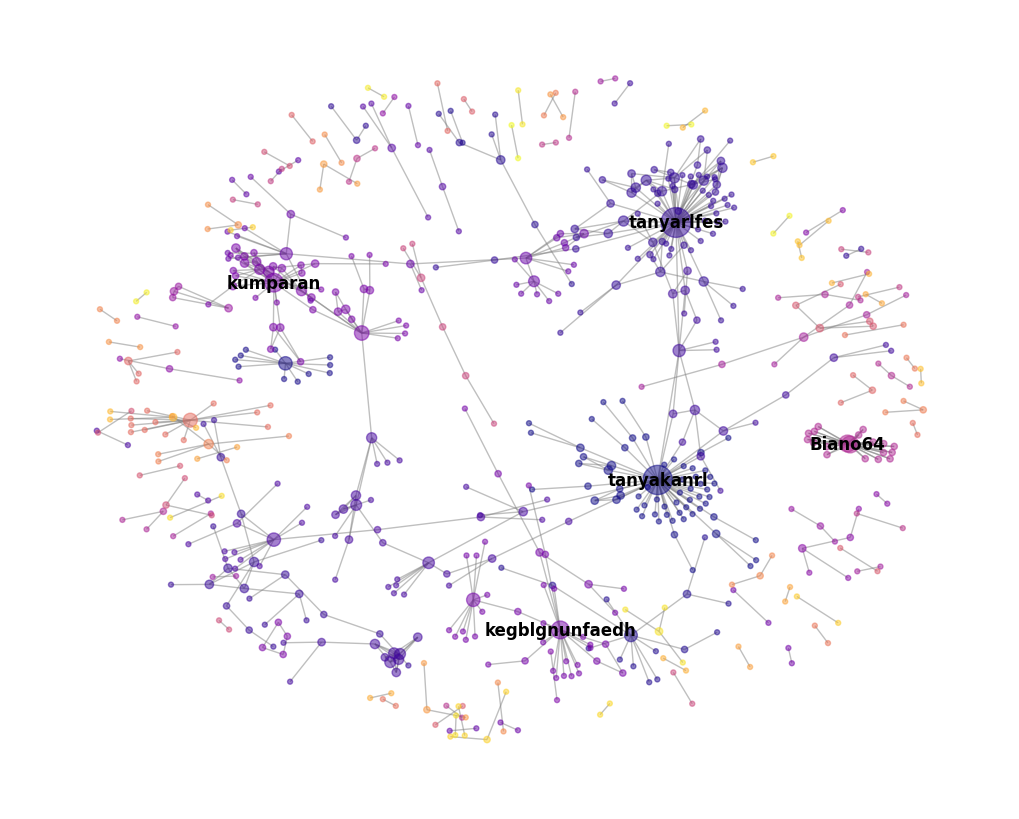

In [ ]:
# Membuat objek Graph dari NetworkX
G = nx.from_pandas_edgelist(a_result, source='From', target='To')

# Menggunakan algoritma Louvain untuk mendeteksi komunitas
partition = community_louvain.best_partition(G)

# Menambahkan informasi komunitas ke dalam graf
nx.set_node_attributes(G, partition, 'community')

# Menghitung derajat setiap node dalam grafik
degree = dict(G.degree())

# Mengatur warna node berdasarkan komunitasnya
node_color = [partition[node] for node in G.nodes()]

# Menambahkan kolom 'Degree' ke dataframe
a_result['Degree'] = a_result['From'].map(degree)

# Menentukan ukuran node berdasarkan derajatnya (misalnya, menggandakan ukuran node)
node_size = [(v * 8) + 5 for v in degree.values()]

# Membuat objek figure dengan ukuran canvas yang diinginkan
fig = plt.figure(figsize=(10, 8))

# Menggambar network graph dengan warna node berdasarkan komunitas
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color=node_color, cmap=plt.cm.plasma, edge_color='gray', font_size=7, alpha=0.5)

# Hanya memberi label pada 5 node teratas
top_nodes = sorted(degree, key=degree.get, reverse=True)[:5]
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='black', font_weight='bold')

plt.show()

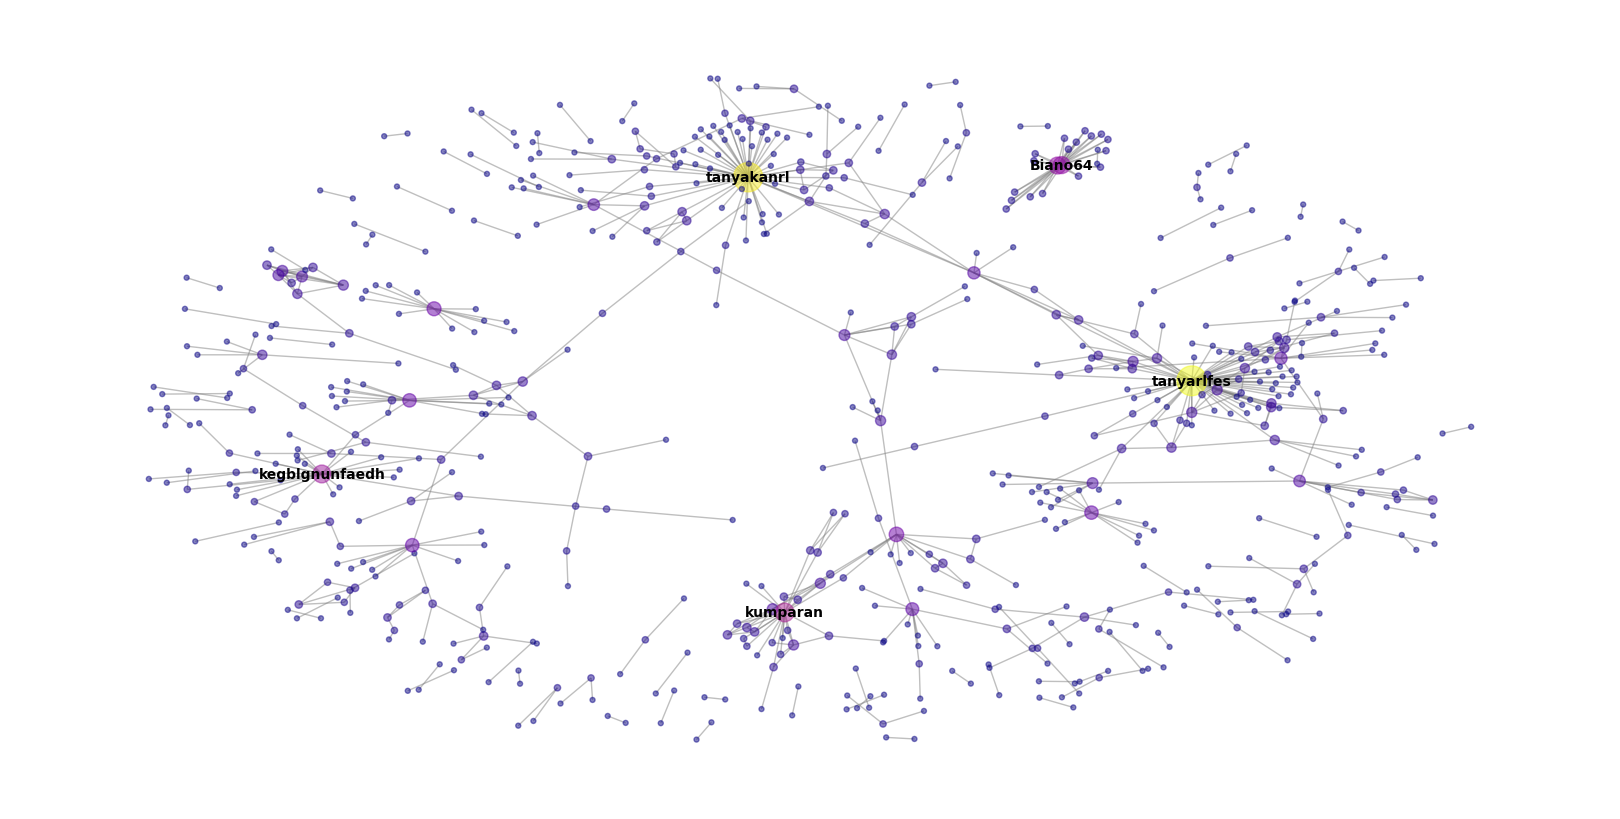

In [ ]:
# Membuat objek Graph dari NetworkX
G = nx.from_pandas_edgelist(a_result, source='From', target='To')
canvas_size = (8*2, 4*2)  # Ganti dengan ukuran yang diinginkan dalam inch (lebar, tinggi)
# Menghitung derajat setiap node dalam grafik
degree = dict(G.degree())
# Mengatur warna node berdasarkan jumlah derajat
node_color = list(degree.values())
# Menambahkan kolom 'Degree' ke dataframe
a_result['Degree'] = a_result['From'].map(degree)
# Menentukan ukuran node berdasarkan derajatnya (misalnya, menggandakan ukuran node)
node_size = [(v * 8)+5 for v in degree.values()]
# Membuat objek figure dengan ukuran canvas yang diinginkan
plt.figure(figsize=canvas_size)
# Menggambar network graph
pos = nx.spring_layout(G, k=0.1)  # Menentukan posisi node dalam grafik
# Hanya beri label pada 5 node teratas
top_nodes = sorted(degree, key=degree.get, reverse=True)[:5]
labels = {node: node for node in top_nodes}

nx.draw(G, pos, with_labels=False, node_size=node_size, node_color=node_color, cmap=plt.cm.plasma, edge_color='gray', font_size=7, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black', font_weight='bold')

plt.show()

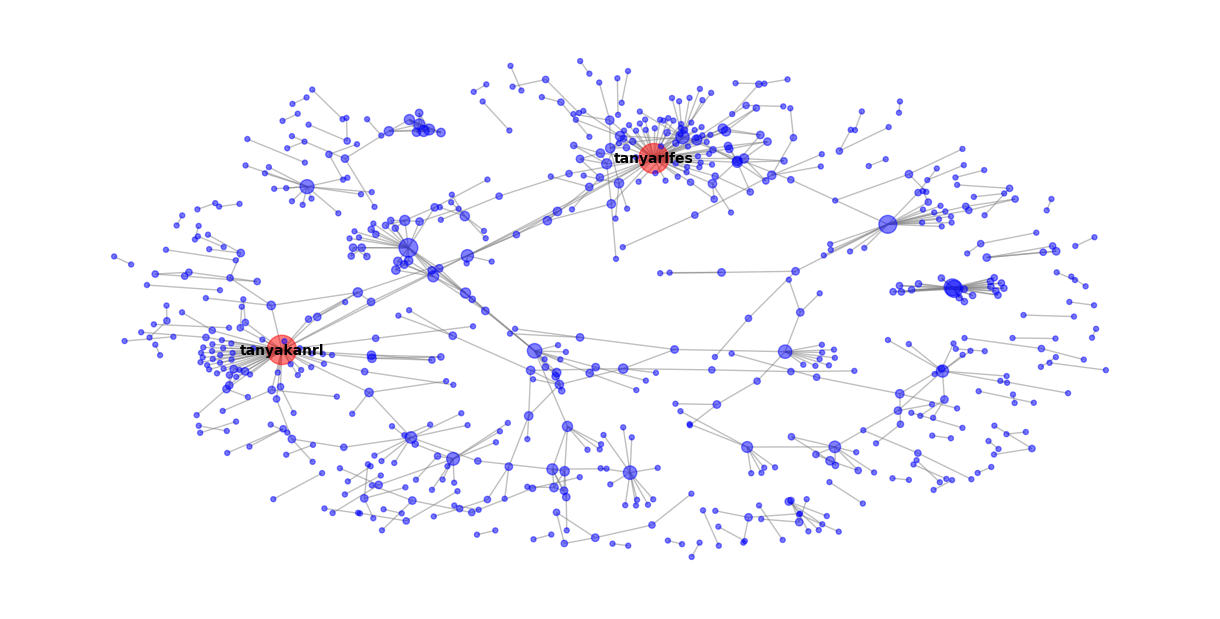

In [ ]:
# Membuat objek Graph dari NetworkX
G = nx.from_pandas_edgelist(a_result, source='From', target='To')

# Menghitung derajat setiap node dalam grafik
degree = dict(G.degree())

# Menentukan warna node berdasarkan jumlah derajat
node_color = [degree[node] for node in G.nodes()]

# Menentukan ukuran node berdasarkan derajatnya (misalnya, menggandakan ukuran node)
node_size = [(v * 8) + 5 for v in degree.values()]

# Membuat objek figure dengan ukuran canvas yang diinginkan
plt.figure(figsize=(12, 6))

# Menggambar network graph
pos = nx.spring_layout(G, k=0.1)  # Menentukan posisi node dalam grafik

# Mendapatkan node dengan derajat tertinggi
top_nodes = sorted(degree, key=degree.get, reverse=True)[:2]

# Menentukan warna yang berbeda untuk node-node dengan derajat tertinggi
node_color_highlighted = ['red' if node in top_nodes else 'blue' for node in G.nodes()]

# Menggambar grafik dengan warna node yang berbeda
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color=node_color_highlighted, cmap=plt.cm.plasma,
        edge_color='gray', font_size=7, alpha=0.5)

# Menambahkan label hanya pada node dengan derajat tertinggi
labels = {node: node if node in top_nodes else '' for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black', font_weight='bold')

plt.show()

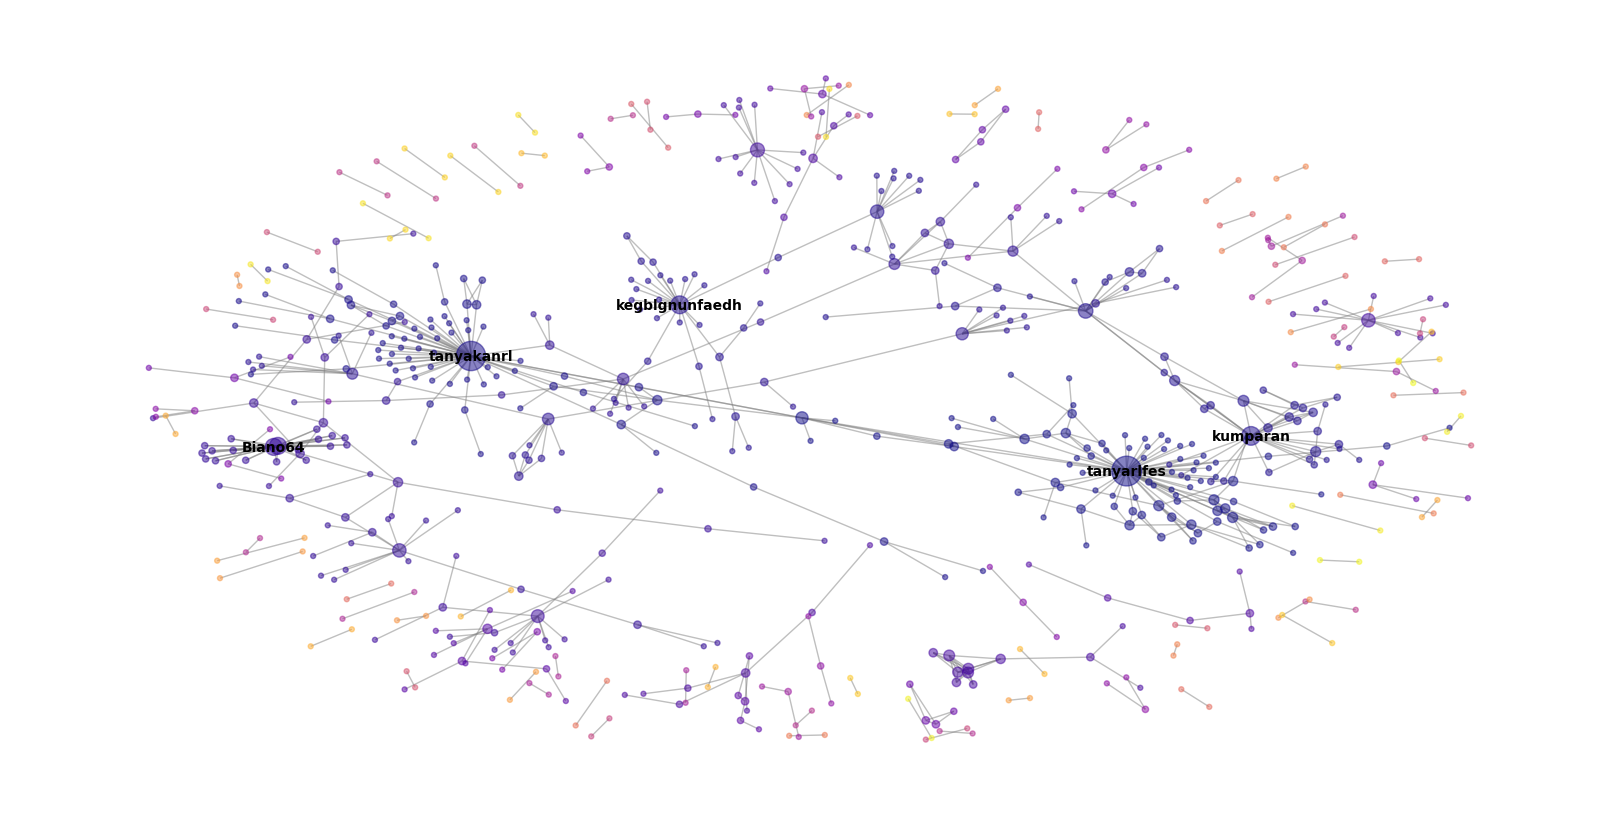

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

# Membuat objek Graph dari NetworkX
G = nx.from_pandas_edgelist(a_result, source='From', target='To')
canvas_size = (8*2, 4*2)  # Ganti dengan ukuran yang diinginkan dalam inch (lebar, tinggi)

# Deteksi komunitas menggunakan Louvain algorithm
communities = list(greedy_modularity_communities(G))

# Menentukan komunitas untuk setiap node
community_dict = {node: i for i, community in enumerate(communities) for node in community}

# Mengatur warna node berdasarkan komunitas
node_color = [community_dict[node] for node in G.nodes()]

# Menghitung derajat setiap node dalam grafik
degree = dict(G.degree())

# Menambahkan kolom 'Degree' ke dataframe
a_result['Degree'] = a_result['From'].map(degree)

# Menentukan ukuran node berdasarkan derajatnya (misalnya, menggandakan ukuran node)
node_size = [(v * 8) + 5 for v in degree.values()]

# Membuat objek figure dengan ukuran canvas yang diinginkan
plt.figure(figsize=canvas_size)

# Menggambar network graph
pos = nx.spring_layout(G, k=0.1)  # Menentukan posisi node dalam grafik

# Hanya memberi label pada 5 node teratas
top_nodes = sorted(degree, key=degree.get, reverse=True)[:5]
labels = {node: node for node in top_nodes}

# Menggambar grafik dengan warna node berdasarkan komunitas
nx.draw(G, pos, with_labels=False, node_size=node_size, node_color=node_color, cmap=plt.cm.plasma, edge_color='gray', font_size=7, alpha=0.5)

# Menambahkan label hanya pada node dengan derajat tertinggi
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black', font_weight='bold')

plt.show()


# **ANALYSIS GRAPH**

1. Mencari pengguna yang paling berpengaruh dengan menggunakan degree centrality.

In [ ]:
#Most influential degree
most_influential_degree = nx.degree_centrality(G)
most_influential_degree

for i in sorted(most_influential_degree, key = most_influential_degree.get, reverse = True):
    print(i, round(most_influential_degree[i], 3))

# dict(sorted(most_influential.items(), key=lambda item: item[1], reverse=True))

tanyarlfes 0.086
tanyakanrl 0.083
kumparan 0.033
kegblgnunfaedh 0.03
Biano64 0.027
DeniSoeprijadie 0.027
memelord_666666 0.02
Buendia13Garcia 0.018
Urrangawak 0.017
sosmedkeras 0.017
GUNUNG_SARIAN 0.017
chairmanGLC 0.015
aguschnd325 0.014
_MbakSri_ 0.014
convomfs 0.012
SantorinisSun 0.012
Bluelinedot 0.011
papantsuu 0.011
Doublehenry1 0.011
Wizth1 0.011
worksfess 0.011
asepbobiirawan 0.011
Leonidas666_ 0.009
_masnazhif 0.009
zerostrayk 0.009
MasaTransisi 0.009
takonokiii 0.009
nontonandchill 0.009
jyankirstein 0.009
bluberiyss 0.008
adriankucka 0.008
aimr0d 0.008
teokjinni 0.008
yuliadore 0.008
tzfahh 0.008
salbar07 0.008
sptraiiiii 0.008
Surehappen 0.008
Widyulwidin 0.008
kaeldafff 0.008
shinoby_knight 0.008
TukangBatuWR 0.006
KurangMotivasi 0.006
xxxyngii 0.006
ffffvalue 0.006
istrirajaminyak 0.006
listudan 0.006
dawiguna 0.006
masfreewifi 0.006
kuasabu2 0.006
FaktaBukanAuta 0.006
Matahari_tmr 0.006
MUIPusat 0.006
odinborrson_ 0.006
stevanusnewman8 0.006
tonzyla 0.006
CossinBlue 0.00

2. Mencari pengguna yang paling berpengaruh dengan menggunakan betweennes centrality.

In [ ]:
#Most influential betweenness
most_influential_betweenness = nx.betweenness_centrality(G)
most_influential_betweenness

for i in sorted(most_influential_betweenness, key = most_influential_betweenness.get, reverse = True):
    print(i, round(most_influential_betweenness[i], 3))

# dict(sorted(most_influential.items(), key=lambda item: item[1], reverse=True))

tanyakanrl 0.088
tanyarlfes 0.067
aguschnd325 0.057
convomfs 0.048
DFishstank6474 0.048
worksfess 0.043
archvyoongi 0.043
nontonandchill 0.038
memelord_666666 0.037
kumparan 0.019
_masnazhif 0.013
sandrrrebr42944 0.009
masfreewifi 0.005
bluberiyss 0.003
AzzamIzzulhaq 0.003
kegblgnunfaedh 0.003
Wizth1 0.002
yourmuffin_s 0.002
shinoby_knight 0.002
LutfiaAyu8 0.002
MasJeerrr 0.002
fajarDputra 0.002
zerostrayk 0.002
eouyu 0.002
GUNUNG_SARIAN 0.002
teokjinni 0.002
BocahBelum 0.002
Surehappen 0.002
jokowi 0.002
bagiduaa 0.002
rokok_garpit95 0.002
kaeldafff 0.002
CNNIndonesia 0.002
sosmedkeras 0.002
AnwarOjat 0.001
jundk_svt 0.001
xxxyngii 0.001
sourdrey 0.001
dinosaurbetina 0.001
itsmebambang 0.001
SantorinisSun 0.001
Bluetigermaster 0.001
ohmybeautybank 0.001
viraia 0.001
AkunApple1 0.001
Badminfans 0.001
neueds 0.001
tiwaydabelyu 0.001
pras18ter 0.001
zerriegmarun 0.001
Tiraaa_F 0.001
tosx_santos 0.001
ginnyyaaa 0.001
gr8diazm 0.001
ronni_rhino 0.001
yrev_xx 0.001
TERClPTA 0.001
dibongce 0

3. Mencari pengguna yang paling berpengaruh dengan menggunakan closeness centrality.

In [ ]:
#Most influential closeness
most_influential_closeness = nx.closeness_centrality(G)
most_influential_closeness

for i in sorted(most_influential_closeness, key = most_influential_closeness.get, reverse = True):
    print(i, round(most_influential_closeness[i], 3))

tanyakanrl 0.095
aguschnd325 0.09
DFishstank6474 0.085
tanyarlfes 0.083
duo_SN 0.082
KurangMotivasi 0.077
convomfs 0.077
masfreewifi 0.076
BocahBelum 0.075
yrev_xx 0.075
TERClPTA 0.075
LutfiaAyu8 0.075
sourdrey 0.075
MasJeerrr 0.075
yournthan 0.075
gelutgelutgelut 0.075
Bluetigermaster 0.075
__gpp__ 0.075
AkunApple1 0.075
neueds 0.075
tiwaydabelyu 0.075
zerriegmarun 0.075
Tiraaa_F 0.075
azrani_18 0.075
ronni_rhino 0.075
hanszoee 0.075
duelyok 0.075
Acengmamenn 0.075
nybbynnyb 0.075
every_dy 0.075
cuxrvy 0.075
gngagss 0.075
HarveySugeng 0.075
Dinars__ 0.075
alasapark 0.075
jennieelskede 0.075
Husnu17Khotimah 0.075
wndra12 0.075
rereambisptln 0.075
hjskiyo 0.075
Flamco_mee14 0.075
HadiahSugus 0.075
istri_karina 0.075
AdiknyaJisung 0.075
feedemady 0.075
evanreviu 0.075
zonazena_ 0.075
qnd2211 0.075
jonathanan79132 0.075
chchipss 0.075
oprek_os 0.075
yhellsbells 0.075
syahrifalanwar 0.075
fairyrosesss 0.075
urtodaygf 0.075
bochanbyun 0.075
soprzzyy_ 0.075
Nanaonana12 0.075
kitabisapa 0.075

In [ ]:
# Filter data hanya untuk nilai "tanyakanrl" di kolom "From"
filtered_data = a_result[a_result['From'] == 'tanyakanrl']

# Menghitung jumlah kemunculan
jumlah_kemunculan = len(filtered_data)

# Tampilkan data yang hanya mengandung "tanyakanrl"
print("Data yang hanya mengandung 'tanyakanrl':")
print(filtered_data)

# Tampilkan jumlah kemunculan
print(f"Jumlah kemunculan 'tanyakanrl': {jumlah_kemunculan}")

Data yang hanya mengandung 'tanyakanrl':
           From               To
1    tanyakanrl       LutfiaAyu8
11   tanyakanrl  Bluetigermaster
64   tanyakanrl      aguschnd325
65   tanyakanrl         hanszoee
72   tanyakanrl      masfreewifi
..          ...              ...
740  tanyakanrl        urtodaygf
743  tanyakanrl       bochanbyun
749  tanyakanrl        soprzzyy_
750  tanyakanrl      Nanaonana12
755  tanyakanrl       kitabisapa

[64 rows x 2 columns]
Jumlah kemunculan 'tanyakanrl': 64


In [ ]:
# Filter data hanya untuk nilai "tanyarlfes" di kolom "From"
filtered_data = a_result[a_result['From'] == 'tanyarlfes']

# Hitung jumlah kemunculan
jumlah_kemunculan = len(filtered_data)

# Tampilkan data yang hanya mengandung "tanyakanrl"
print("Data yang hanya mengandung 'tanyakrlfes':")
print(filtered_data)

# Tampilkan jumlah kemunculan
print(f"Jumlah kemunculan 'tanyarlfes': {jumlah_kemunculan}")

Data yang hanya mengandung 'tanyakrlfes':
           From               To
23   tanyarlfes       bluberiyss
29   tanyarlfes   KurangMotivasi
36   tanyarlfes  penikmatkoppi22
39   tanyarlfes      bIueadngrey
41   tanyarlfes   KurangMotivasi
..          ...              ...
721  tanyarlfes     yourmuffin_s
739  tanyarlfes          Miiyeen
742  tanyarlfes          aisunxm
757  tanyarlfes       CossinBlue
759  tanyarlfes          fajardz

[74 rows x 2 columns]
Jumlah kemunculan 'tanyarlfes': 74


In [ ]:
# Menemukan most influential user menggunakan degree centrality
degree_centrality = nx.degree_centrality(G)
most_influential_user_degree, degree_centrality_value = max(degree_centrality.items(), key=lambda x: x[1])
print("Most Influential User With Degree Centrality:", most_influential_user_degree, ",dengan nilai centrality:", degree_centrality_value)

# Menemukan most influential user menggunakan betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
most_influential_user_betweenness, betweenness_centrality_value = max(betweenness_centrality.items(), key=lambda x: x[1])
print("Most Influential User With Betweenness Centrality:", most_influential_user_betweenness, ",dengan nilai centrality:", betweenness_centrality_value)

# Menemukan most influential user menggunakan closeness centrality
closeness_centrality = nx.closeness_centrality(G)
most_influential_user_closeness, closeness_centrality_value = max(closeness_centrality.items(), key=lambda x: x[1])
print("Most Influential User With Closeness Centrality:", most_influential_user_closeness, ",dengan nilai centrality:", closeness_centrality_value)

Most Influential User With Degree Centrality: tanyarlfes ,dengan nilai centrality: 0.08623298033282904
Most Influential User With Betweenness Centrality: tanyakanrl ,dengan nilai centrality: 0.08832118461467932
Most Influential User With Closeness Centrality: tanyakanrl ,dengan nilai centrality: 0.09544232774701467


1. Penjelasan Hasil Degree Centrality

Bisa dilihat bahwa hanya pada perhitungan degree centrality yang menghasilkan most influencer user yang berbeda, hal ini dikarenakan perhitungan degree centrality mencari jumlah koneksi/edges tertinggi yang dimiliki oleh suatu nodes, dengan kata lain **"tanyarlfes"** memiliki jumlah interaksi yang paling banyak diantara user lainnya dalam tweet dengan kata kunci "Boikot".

Hal ini membuktikan bahwa **"tanyarlfes"** merupakan akun yang paling banyak di mention.